In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
metadata = pd.read_csv("../master_metadata.csv")
metadata.loc[metadata["Site"] == "Blank", "Name"] = "Field Blank"
metadata.loc[metadata["Site"] == "Extraction Blank", "Name"] = "Extraction Blank"
metadata.loc[metadata["Site"] == "PCR Blank", "Name"] = "PCR Blank"
metadata = metadata[metadata["EGCF-ID"].notna()].reset_index(drop=True)

In [3]:
asv = pd.read_csv("../dada2_asv_table_with_taxonomy.csv")
asv["Overall_Best"] = asv["Best_Hit_Refseq"]
asv["Overall_Best_Percent_ID"] = asv["Percent_ID_Refseq"]
asv["Overall_Best_Taxonomic_Level"] = asv['Best_Hit_Taxonomic_level_Refseq']
asv.loc[(asv["Percent_ID_Refseq"] < 98) & (asv["evalue_Refseq"] > asv["evalue"]), "Overall_Best"] = asv["Best_Hit"]
asv.loc[(asv["Percent_ID_Refseq"] < 98) & (asv["evalue_Refseq"] > asv["evalue"]), "Overall_Best_Percent_ID"] = asv["Percent_ID"]
asv.loc[(asv["Percent_ID_Refseq"] < 98) & (asv["evalue_Refseq"] > asv["evalue"]), "Overall_Best_Taxonomic_Level"] = asv['Best_Hit_Taxonomic_level']
asv = asv[asv["Class"] == "Actinopteri"].reset_index(drop=True)
fish = asv.copy()
#fish = asv[asv["CountsAcross"] > 10].reset_index(drop=True)
tmp = fish[fish.columns[2:-26].tolist() + ["Overall_Best"]].groupby('Overall_Best').transform('sum')
tmp[[i for i in fish.columns.tolist() if i not in tmp.columns.tolist()]] = fish[[i for i in fish.columns.tolist() if i not in tmp.columns.tolist()]]
tmp = tmp.drop_duplicates(fish.columns[2:-26].tolist() + ["Overall_Best"]).reset_index(drop=True)
fish = tmp.copy()
fish["Primer"] = "MiFish"
for samp in fish.columns[0:-29].tolist():
    fish.loc[fish[samp] < (fish[samp].sum() * 0.001), samp] = 0

In [4]:
fish["in_nsamps"] = fish[fish.columns[0:-29].tolist()].astype(bool).sum(axis=1)
fish = fish[fish["in_nsamps"] > 1].reset_index(drop=True)

In [5]:
asv = pd.read_csv("../dada2_mussels_asv_table_with_taxonomy.csv")
asv = asv[asv["CountsAcross"] > 10].reset_index(drop=True)
mussels = asv[asv["Best_Hit"].notna()][asv["Best_Hit"] != "NA"].reset_index(drop=True)
mussels["Overall_Best"] = mussels["Best_Hit"]
tmp = mussels[mussels.columns[2:-24].tolist() + ["Best_Hit"]].groupby('Best_Hit').transform('sum')
tmp[[i for i in mussels.columns.tolist() if i not in tmp.columns.tolist()]] = mussels[[i for i in mussels.columns.tolist() if i not in tmp.columns.tolist()]]
tmp = tmp.drop_duplicates(mussels.columns[2:-24].tolist() + ["Best_Hit"]).reset_index(drop=True)
mussels = tmp.copy()
mussels["Overall_Best"] = mussels["Best_Hit"]
mussels["Primer"] = "Mussel"
for samp in mussels.columns[0:-27].tolist():
    mussels.loc[mussels[samp] < (mussels[samp].sum() * 0.001), samp] = 0

/tmp/ipykernel_3133423/2494241999.py:1: DtypeWarning: Columns (394,395,396,397,398,399,400,403,404,405,406,407,408,409,412,414) have mixed types. Specify dtype option on import or set low_memory=False.
  asv = pd.read_csv("../dada2_mussels_asv_table_with_taxonomy.csv")
/tmp/ipykernel_3133423/2494241999.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mussels = asv[asv["Best_Hit"].notna()][asv["Best_Hit"] != "NA"].reset_index(drop=True)


In [6]:
mussels["in_nsamps"] = mussels[mussels.columns[0:-27].tolist()].astype(bool).sum(axis=1)
mussels = mussels[mussels["in_nsamps"] > 1].reset_index(drop=True)

In [7]:
asv = pd.read_csv("../dada2_insects_asv_table_with_taxonomy.csv")
asv = asv[asv["CountsAcross"] > 10].reset_index(drop=True)
insects = asv[asv["Best_Hit"].notna()][asv["Best_Hit"] != "NA"][asv["Best_Hit_Taxonomic_level"].isin(["Species", "Genus", "Family"])].reset_index(drop=True)
insects = insects[insects.columns[2:-21].tolist() + ["Family", 'Order', "Class", "Phylum"]]
tmp = insects.groupby('Family').transform('sum')
tmp[[i for i in insects.columns.tolist() if i not in tmp.columns.tolist()]] = insects[[i for i in insects.columns.tolist() if i not in tmp.columns.tolist()]]
tmp = tmp.drop_duplicates(insects.columns[2:-21].tolist() + ["Family"]).reset_index(drop=True)
insects = tmp.copy()
insects["Overall_Best"] = insects["Family"]
insects["Primer"] = "Insects"
for samp in insects.columns[0:-8].tolist():
    insects.loc[insects[samp] < (insects[samp].sum() * 0.001), samp] = 0

/tmp/ipykernel_3133423/1398026162.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  insects = asv[asv["Best_Hit"].notna()][asv["Best_Hit"] != "NA"][asv["Best_Hit_Taxonomic_level"].isin(["Species", "Genus", "Family"])].reset_index(drop=True)
/tmp/ipykernel_3133423/1398026162.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  insects = asv[asv["Best_Hit"].notna()][asv["Best_Hit"] != "NA"][asv["Best_Hit_Taxonomic_level"].isin(["Species", "Genus", "Family"])].reset_index(drop=True)


In [8]:
insects["in_nsamps"] = insects[insects.columns[0:-8].tolist()].astype(bool).sum(axis=1)
insects = insects[insects["in_nsamps"] > 1].reset_index(drop=True)

In [16]:
mosslake = insects.columns[0:-6].tolist()

In [17]:
joined = pd.concat([fish, mussels, insects]).reset_index(drop=True)
joined = joined[joined["Overall_Best"].notna()].reset_index(drop=True)

In [18]:
rename = metadata[["EGCF-ID", "Name", "Description"]]
rename.columns = ["index", "Name", "Description"]
rename = rename.fillna("NA")

In [19]:
metadata["Merged"] = metadata["Name"] + "_" + metadata["Season"]

In [20]:
df = joined[joined["Primer"].isin(["MiFish"])].reset_index(drop=True)
df = df[df.columns[0:-34].tolist() + ["Overall_Best"]].reset_index(drop=True)
df.columns = [int(i) for i in df.columns.tolist()[:-1]] + [df.columns.tolist()[-1]]

In [21]:
test = df[[int(i) for i in metadata["EGCF-ID"][metadata["Name"] == "Moss Lake"].tolist()] + ["Overall_Best"]].set_index("Overall_Best").T

In [22]:
from sklearn.metrics import jaccard_score

y_true = [0, 1, 1, 0]
y_pred = [1, 1, 0, 0]

print(jaccard_score(y_true, y_pred))  # Output: 0.3333333333333333

0.3333333333333333


In [23]:
print(jaccard_score(df[105].tolist(), df[106].tolist(), average = 'weighted'))

0.8021390374331551


In [24]:
upsetdata = df.set_index("Overall_Best").T

for col in upsetdata.columns.tolist():
    upsetdata.loc[upsetdata[col] > 0, col] = 1

In [25]:
upsetdata = upsetdata.reset_index(drop=False)

In [26]:
upsetdata.columns = ["EGCF-ID"] + upsetdata.columns[1:].tolist()

In [27]:
upsetdata["EGCF-ID"] = upsetdata["EGCF-ID"].astype(str)

In [28]:
upsetdata = upsetdata.merge(metadata[["EGCF-ID", "Name", "Season", "Description", "Site", "Replicate"]], how = "left", on = "EGCF-ID")

In [29]:
upsetdata = upsetdata.sort_values(["Name", "Season", "Description"]).reset_index(drop=True)

In [30]:
upsetdata = upsetdata[upsetdata["Description"] != "Blank"][upsetdata["Description"].notna()].reset_index(drop=True)

/tmp/ipykernel_3133423/899299533.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  upsetdata = upsetdata[upsetdata["Description"] != "Blank"][upsetdata["Description"].notna()].reset_index(drop=True)


In [31]:
replicated = upsetdata[upsetdata["Replicate"].notna()].reset_index(drop=True)

In [32]:
replicated["tmp"] = replicated["Name"] + replicated["Season"] + replicated["Description"] + replicated["Site"]

In [33]:
replicated["type"] = replicated["Name"] + replicated["Season"] + replicated["Description"]

In [214]:
paired_sp_content = []
for hab in replicated.type.unique():
    if len(replicated[replicated["type"] == hab][replicated["Replicate"] == "2"]) > 0:
        tmpspot = replicated[replicated["type"] == hab].reset_index(drop=True)
        for i in tmpspot["tmp"].unique().tolist():
            if len(tmpspot[tmpspot["tmp"] == i]) > 1:
                pairs = tmpspot[tmpspot["tmp"] == i].reset_index(drop=True)
                pairs = pairs[pairs.columns[1:-7]].T
                pairs[2] = pairs.sum(axis=1, numeric_only=True)
                rep1 = (pairs[0] != 0).sum()
                rep2 = (pairs[1] != 0).sum()
                combined = (pairs[2] != 0).sum()
                row1 = [i, combined / rep1, rep1, combined]
                row2 = [i, combined / rep2, rep2, combined ]
                paired_sp_content = paired_sp_content + [row1, row2]

/tmp/ipykernel_3133423/1267121566.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(replicated[replicated["type"] == hab][replicated["Replicate"] == "2"]) > 0:
/tmp/ipykernel_3133423/1267121566.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(replicated[replicated["type"] == hab][replicated["Replicate"] == "2"]) > 0:
/tmp/ipykernel_3133423/1267121566.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(replicated[replicated["type"] == hab][replicated["Replicate"] == "2"]) > 0:
/tmp/ipykernel_3133423/1267121566.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(replicated[replicated["type"] == hab][replicated["Replicate"] == "2"]) > 0:
/tmp/ipykernel_3133423/1267121566.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(replicated[replicated["type"] == hab][replicated["Replicate"] == "2"]) 

In [215]:
paired_sp_content = pd.DataFrame(paired_sp_content)

In [273]:
from itertools import combinations
vols = {1: 150, 2: 300, 3: 450, 4: 600, 5: 750, 6: 900}
for n in list(vols.keys()):
    for comb in combinations(sagdeep, n):
        print(comb)

('344',)
('352',)
('316',)
('317',)
('324',)
('327',)
('344', '352')
('344', '316')
('344', '317')
('344', '324')
('344', '327')
('352', '316')
('352', '317')
('352', '324')
('352', '327')
('316', '317')
('316', '324')
('316', '327')
('317', '324')
('317', '327')
('324', '327')
('344', '352', '316')
('344', '352', '317')
('344', '352', '324')
('344', '352', '327')
('344', '316', '317')
('344', '316', '324')
('344', '316', '327')
('344', '317', '324')
('344', '317', '327')
('344', '324', '327')
('352', '316', '317')
('352', '316', '324')
('352', '316', '327')
('352', '317', '324')
('352', '317', '327')
('352', '324', '327')
('316', '317', '324')
('316', '317', '327')
('316', '324', '327')
('317', '324', '327')
('344', '352', '316', '317')
('344', '352', '316', '324')
('344', '352', '316', '327')
('344', '352', '317', '324')
('344', '352', '317', '327')
('344', '352', '324', '327')
('344', '316', '317', '324')
('344', '316', '317', '327')
('344', '316', '324', '327')
('344', '317', '324'

In [262]:
sagdeep = ["344", "352", "316", "317", "324", "327"]
sagsurface = ["318", "319", "322", "323", "349", "353"]
sagnearshore = ["325", "326", "328", "329", "343", "345"]
dartdeep = ["290", "291", "299", "300", "307", "308"]
dartsurface = ["293", "294", "297", "298", "306", "315"]
dartnearshore = ["292", "304", "295", "296", "309", "310"]

In [258]:
replicated[replicated["EGCF-ID"] == "344"]

,EGCF-ID,Lepomis,Lepomis gibbosus,Perca flavescens,Micropterus salmoides,Salvelinus fontinalis,Catostomus commersonii,Semotilus atromaculatus,Umbra limi,Notemigonus crysoleucas,...,Cottus cognatus,Salmo trutta,Ameiurus,Name,Season,Description,Site,Replicate,tmp,type
218,344,0.0,0.0,0.0,0.0,23797.0,54304.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Sagamore,Early Fall,Deep,1,2,SagamoreEarly FallDeep1,SagamoreEarly FallDeep


In [259]:
replicated.columns

Index(['EGCF-ID', 'Lepomis', 'Lepomis gibbosus', 'Perca flavescens',
       'Micropterus salmoides', 'Salvelinus fontinalis',
       'Catostomus commersonii', 'Semotilus atromaculatus', 'Umbra limi',
       'Notemigonus crysoleucas', 'Ameiurus nebulosus', 'Micropterus dolomieu',
       'Chrosomus neogaeus', 'Salvelinus namaycush', 'Ambloplites rupestris',
       'Rhinichthys atratulus', 'Chrosomus eos', 'Prosopium cylindraceum',
       'Pimephales notatus', 'Fundulus diaphanus', 'Lepomis macrochirus',
       'Couesius plumbeus', 'Osmerus mordax', 'Cottidae', 'Coregonus',
       'Luxilus', 'Catostomus catostomus', 'Salmo salar', 'Noturus insignis',
       'Ameiurus melas', 'Exoglossum maxillingua', 'Sander vitreus',
       'Cottus cognatus', 'Salmo trutta', 'Ameiurus', 'Name', 'Season',
       'Description', 'Site', 'Replicate', 'tmp', 'type'],
      dtype='object')

In [247]:
tmp = paired_sp_content[paired_sp_content[0].str.contains("Sagamore")][paired_sp_content[0].str.contains("Deep")]

/tmp/ipykernel_3133423/1771499277.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = paired_sp_content[paired_sp_content[0].str.contains("Sagamore")][paired_sp_content[0].str.contains("Deep")]


In [248]:
tmp1 = tmp[[2]]
tmp1.columns = ["Species"]
tmp1["Volume"] = 150
tmp2 = tmp[[3]]
tmp2.columns = ["Species"]
tmp2["Volume"] = 300
tmp = pd.concat([tmp1, tmp2])

/tmp/ipykernel_3133423/4155190058.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp1["Volume"] = 150
/tmp/ipykernel_3133423/4155190058.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp2["Volume"] = 300


<Axes: xlabel='Volume', ylabel='Species'>

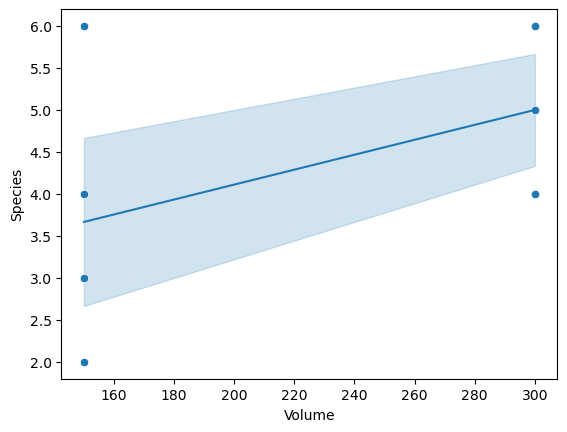

In [251]:
sns.lineplot(x = tmp["Volume"], y = tmp["Species"])
sns.scatterplot(x = tmp["Volume"], y = tmp["Species"])

In [252]:
paired_sp_content

,0,1,2,3
0,Dart LakeEarly FallDeep5,3.000000,1,3
1,Dart LakeEarly FallDeep5,1.500000,2,3
2,Dart LakeEarly FallDeep1,1.250000,4,5
3,Dart LakeEarly FallDeep1,1.666667,3,5
4,Dart LakeEarly FallDeep3,6.000000,1,6
5,Dart LakeEarly FallDeep3,1.000000,6,6
6,Dart LakeEarly FallNear Shore5A,1.666667,3,5
7,Dart LakeEarly FallNear Shore5A,1.666667,3,5
8,Dart LakeEarly FallNear Shore1A,1.500000,2,3
9,Dart LakeEarly FallNear Shore1A,1.500000,2,3


In [84]:
(paired_sp_content[1].mean())

np.float64(1.807671957671958)

In [169]:
(paired_sp_content[1]
 [paired_sp_content[0].str.contains("Surface|Shore")].mean())

np.float64(1.7427579365079364)

In [78]:
(paired_sp_content[1][paired_sp_content[0].str.contains("Dart")]
 [paired_sp_content[0].str.contains("Deep")].mean())

np.float64(2.402777777777778)

In [79]:
(paired_sp_content[1][paired_sp_content[0].str.contains("Dart")]
 [paired_sp_content[0].str.contains("Surface|Shore")].mean())

np.float64(1.625)

In [80]:
(paired_sp_content[1][paired_sp_content[0].str.contains("Dart")].mean())

np.float64(1.8842592592592595)

In [81]:
(paired_sp_content[1][paired_sp_content[0].str.contains("Sagamore")]
 [paired_sp_content[0].str.contains("Deep")].mean())

np.float64(1.472222222222222)

In [82]:
(paired_sp_content[1][paired_sp_content[0].str.contains("Sagamore")]
 [paired_sp_content[0].str.contains("Surface|Shore")].mean())

np.float64(1.860515873015873)

In [83]:
(paired_sp_content[1][paired_sp_content[0].str.contains("Sagamore")].mean())

np.float64(1.731084656084656)

In [195]:
accumulation_curves = pd.read_csv("../accumulation_curves.csv")

In [196]:
plotting_accumulation = accumulation_curves.groupby(["Name", "Season", "Number of Samples"]).mean().reset_index()

In [197]:
all_lakes = metadata["Name"].unique()
all_lakes = [i for i in all_lakes if i not in ["PCR Blank", "Extraction Blank", "Field Blank", np.nan]]

In [198]:
best_models_by_lake = pd.read_csv("../fitted_curves.csv")

In [199]:
best_models_by_lake = best_models_by_lake.set_index("Lake").to_dict(orient = "index")

In [200]:
fitted_data = pd.read_csv("../fitted_data.csv")

In [201]:
ninety = pd.DataFrame()
for i in all_lakes:
    for season in ["Early Fall", "Spring"]:
        try:
            if best_models_by_lake[i + "_" + season]["Function"] in ["Hill", 'Michaelis-Menten']:
                tmp = (fitted_data
                 [fitted_data["Name"] == i]
                 [fitted_data["Season"] == season]
                 [fitted_data["Number of Species"] > 
                  (float(best_models_by_lake[i + "_" + season]["Parameters"].replace("[", "").strip().split(" ")[0]) * 0.9)]
                 .reset_index(drop=True).head(1))
                ninety = pd.concat([ninety, tmp]).reset_index(drop=True)
        except:
            pass

/tmp/ipykernel_3133423/4178923949.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = (fitted_data
/tmp/ipykernel_3133423/4178923949.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = (fitted_data
/tmp/ipykernel_3133423/4178923949.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = (fitted_data
/tmp/ipykernel_3133423/4178923949.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = (fitted_data
/tmp/ipykernel_3133423/4178923949.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = (fitted_data
/tmp/ipykernel_3133423/4178923949.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = (fitted_data
/tmp/ipykernel_3133423/4178923949.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = (fitted_data
/tmp/ipykernel_3133423/4178923949.py:6: U

In [280]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

/tmp/ipykernel_3133423/1841130467.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = (fitted_data[fitted_data["Name"] == i]
/tmp/ipykernel_3133423/1841130467.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = (fitted_data[fitted_data["Name"] == i]
/tmp/ipykernel_3133423/1841130467.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = (fitted_data[fitted_data["Name"] == i]
/tmp/ipykernel_3133423/1841130467.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = (fitted_data[fitted_data["Name"] == i]
/tmp/ipykernel_3133423/1841130467.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = (fitted_data[fitted_data["Name"] == i]
/tmp/ipykernel_3133423/1841130467.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.

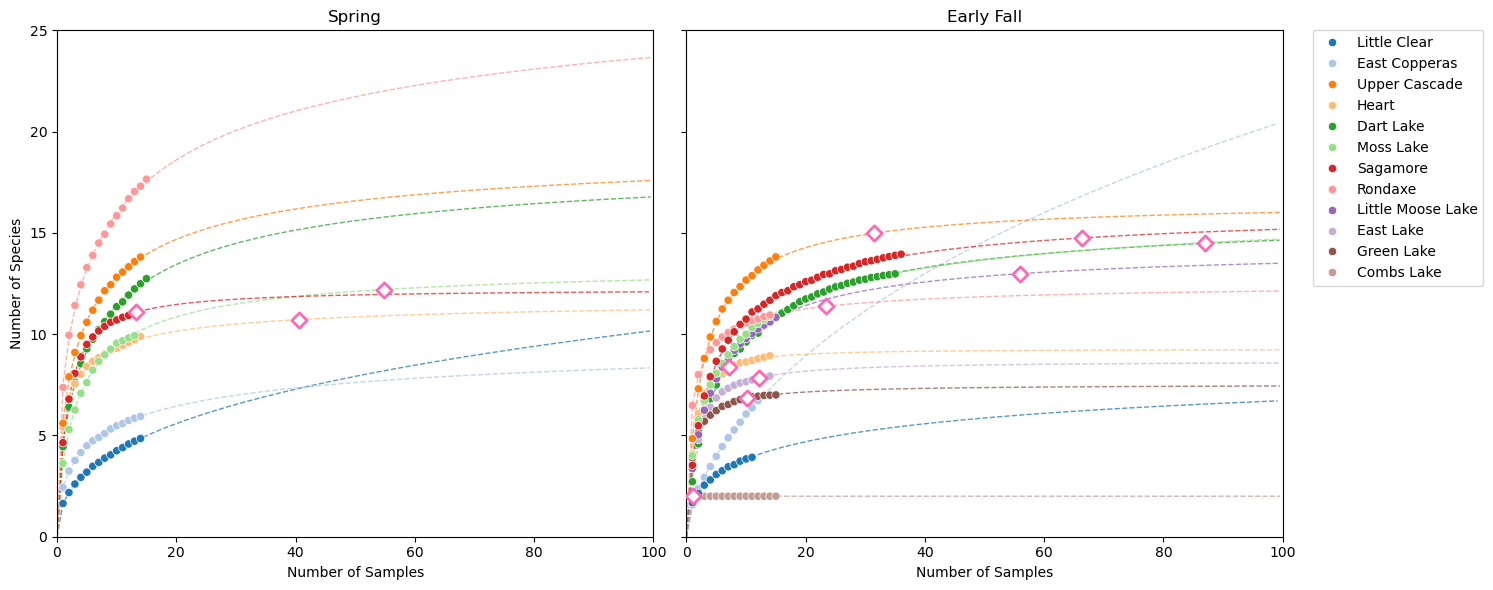

In [281]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

for i in all_lakes:
    try:
        sns.lineplot(data = (fitted_data[fitted_data["Name"] == i]
                         [fitted_data["Season"] == "Spring"]
                         [fitted_data["Number of Samples"] <= 100]).reset_index(drop=True), 
                   x = "Number of Samples", y = "Number of Species", palette = "tab20", linestyle='--',
                     hue = "Name", lw = 1, legend = False, hue_order=all_lakes, ax=axes[0], alpha = 0.75)
    except:
        pass
sns.scatterplot(data = plotting_accumulation[plotting_accumulation["Season"] == "Spring"].reset_index(drop=True), 
               x = "Number of Samples", y = "Number of Species", palette = "tab20",
                hue = "Name", zorder=7, ax=axes[0], legend = False, hue_order=all_lakes)#, legend = False)
ax1 = axes[0]
ax1.scatter(x = ninety["Number of Samples"][ninety["Season"] == "Spring"], 
            y = ninety["Number of Species"][ninety["Season"] == "Spring"],
                edgecolors = "hotpink", marker = 'D', facecolors='white', 
            s = 60, zorder=8, lw=2.0)


for i in all_lakes:
    try:
        sns.lineplot(data = (fitted_data[fitted_data["Name"] == i]
                         [fitted_data["Season"] == "Early Fall"]
                         [fitted_data["Number of Samples"] <= 100]).reset_index(drop=True), 
                   x = "Number of Samples", y = "Number of Species", palette = "tab20", linestyle='--',
                     hue = "Name", lw = 1, legend = False, hue_order=all_lakes, ax=axes[1], alpha = 0.75)
    except:
        pass
sns.scatterplot(data = plotting_accumulation[plotting_accumulation["Season"] == "Early Fall"].reset_index(drop=True), 
               x = "Number of Samples", y = "Number of Species", palette = "tab20",
                hue = "Name", zorder=7, ax=axes[1], hue_order=all_lakes)
ax2 = axes[1]
ax2.scatter(x = ninety["Number of Samples"][ninety["Season"] == "Early Fall"], 
            y = ninety["Number of Species"][ninety["Season"] == "Early Fall"],
                edgecolors = "hotpink", marker = 'D', facecolors='white', 
            s = 60, zorder=8, lw=2.0)


axes[0].set_title("Spring")
axes[1].set_title("Early Fall")
# Add legend (shared between both subplots)
axes[0].set_xlim(0, 100)
axes[0].set_ylim(0, 25)
axes[1].set_xlim(0, 100)
axes[1].set_ylim(0, 25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.savefig("../extrapolated_accumulation.pdf", dpi = 300)

In [276]:
fitted_data["Number of Samples (Scaled)"] = fitted_data["Number of Samples"] / (paired_sp_content[1].mean())
plotting_accumulation["Number of Samples (Scaled)"] = plotting_accumulation["Number of Samples"] / (paired_sp_content[1].mean())
ninety["Number of Samples (Scaled)"] = ninety["Number of Samples"] / (paired_sp_content[1].mean())

/tmp/ipykernel_3133423/3081062594.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = (fitted_data[fitted_data["Name"] == i]
/tmp/ipykernel_3133423/3081062594.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = (fitted_data[fitted_data["Name"] == i]
/tmp/ipykernel_3133423/3081062594.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = (fitted_data[fitted_data["Name"] == i]
/tmp/ipykernel_3133423/3081062594.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = (fitted_data[fitted_data["Name"] == i]
/tmp/ipykernel_3133423/3081062594.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = (fitted_data[fitted_data["Name"] == i]
/tmp/ipykernel_3133423/3081062594.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.

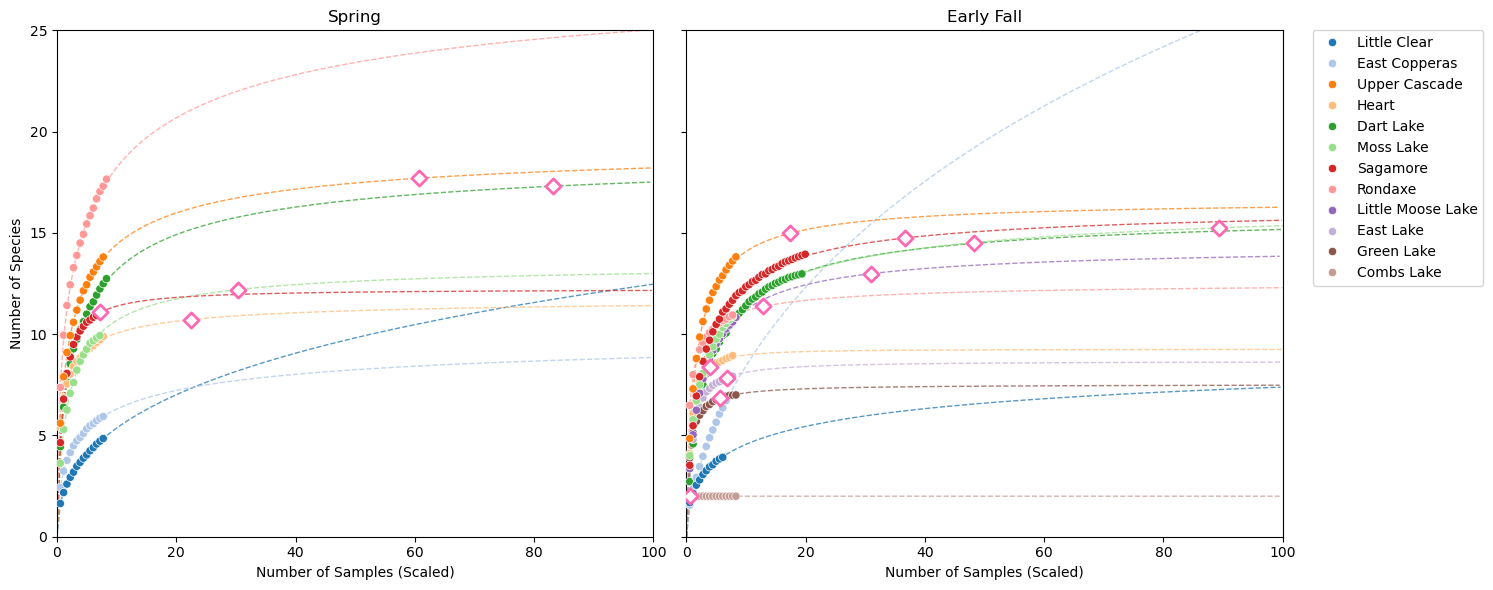

In [282]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

for i in all_lakes:
    try:
        sns.lineplot(data = (fitted_data[fitted_data["Name"] == i]
                         [fitted_data["Season"] == "Spring"]
                         [fitted_data["Number of Samples (Scaled)"] <= 100]).reset_index(drop=True), 
                   x = "Number of Samples (Scaled)", y = "Number of Species", palette = "tab20", linestyle='--',
                     hue = "Name", lw = 1, legend = False, hue_order=all_lakes, ax=axes[0], alpha = 0.75)
    except:
        pass
sns.scatterplot(data = plotting_accumulation[plotting_accumulation["Season"] == "Spring"].reset_index(drop=True), 
               x = "Number of Samples (Scaled)", y = "Number of Species", palette = "tab20",
                hue = "Name", zorder=7, ax=axes[0], legend = False, hue_order=all_lakes)#, legend = False)
ax1 = axes[0]
ax1.scatter(x = ninety["Number of Samples (Scaled)"][ninety["Season"] == "Spring"], 
            y = ninety["Number of Species"][ninety["Season"] == "Spring"],
                edgecolors = "hotpink", marker = 'D', facecolors='white', 
            s = 60, zorder=8, lw=2.0)


for i in all_lakes:
    try:
        sns.lineplot(data = (fitted_data[fitted_data["Name"] == i]
                         [fitted_data["Season"] == "Early Fall"]
                         [fitted_data["Number of Samples (Scaled)"] <= 100]).reset_index(drop=True), 
                   x = "Number of Samples (Scaled)", y = "Number of Species", palette = "tab20", linestyle='--',
                     hue = "Name", lw = 1, legend = False, hue_order=all_lakes, ax=axes[1], alpha = 0.75)
    except:
        pass
sns.scatterplot(data = plotting_accumulation[plotting_accumulation["Season"] == "Early Fall"].reset_index(drop=True), 
               x = "Number of Samples (Scaled)", y = "Number of Species", palette = "tab20",
                hue = "Name", zorder=7, ax=axes[1], hue_order=all_lakes)
ax2 = axes[1]
ax2.scatter(x = ninety["Number of Samples (Scaled)"][ninety["Season"] == "Early Fall"], 
            y = ninety["Number of Species"][ninety["Season"] == "Early Fall"],
                edgecolors = "hotpink", marker = 'D', facecolors='white', 
            s = 60, zorder=8, lw=2.0)


axes[0].set_title("Spring")
axes[1].set_title("Early Fall")
# Add legend (shared between both subplots)
axes[0].set_xlim(0, 100)
axes[0].set_ylim(0, 25)
axes[1].set_xlim(0, 100)
axes[1].set_ylim(0, 25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.savefig("../extrapolated_accumulation_scaled.pdf", dpi = 300)

In [210]:
best_models_by_lake

{'Little Clear_Spring': {'Function': 'Hill',
  'Parameters': '[5.33013578e+01 2.74993738e+03 4.35784157e-01]',
  'RSS': 0.0021307514063822},
 'Little Clear_Early Fall': {'Function': 'Hill',
  'Parameters': '[10.54138798 31.48338767  0.48724341]',
  'RSS': 0.0058127496155454},
 'East Copperas_Spring': {'Function': 'Hill',
  'Parameters': '[10.51690024  8.69728931  0.5505833 ]',
  'RSS': 0.0057770281542518},
 'East Copperas_Early Fall': {'Function': 'Hill',
  'Parameters': '[ 80.         549.41756782   0.6261264 ]',
  'RSS': 0.0126510426541587},
 'Upper Cascade_Spring': {'Function': 'Hill',
  'Parameters': '[19.66531611  3.87078851  0.65721586]',
  'RSS': 0.0651770333006955},
 'Upper Cascade_Early Fall': {'Function': 'Hill',
  'Parameters': '[16.6493059   2.66495517  0.88997939]',
  'RSS': 0.0486147388358583},
 'Heart_Spring': {'Function': 'Hill',
  'Parameters': '[11.895724    1.28628585  0.64001396]',
  'RSS': 0.0376974545243916},
 'Heart_Early Fall': {'Function': 'Hill',
  'Parameters

In [46]:
jaccard_dict = {}
rep_jaccard_dict = {}
for hab in replicated.type.unique():
    habtype = replicated[replicated["type"] == hab][replicated["Replicate"] == "1"][replicated.columns.tolist()[1:-6]].T
    tmpjaccard = []
    for combo in combinations(habtype.columns.tolist(), 2):
        tmpjaccard = tmpjaccard + [jaccard_score(
            habtype[list(combo)[0]].tolist(), 
            habtype[list(combo)[1]].tolist(),
            average = 'weighted')]
    jaccard_dict[hab] = tmpjaccard
    if len(replicated[replicated["type"] == hab][replicated["Replicate"] == "2"]) > 0:
        jaccards = []
        tmpspot = replicated[replicated["type"] == hab].reset_index(drop=True)
        for i in tmpspot["tmp"].unique().tolist():
            if len(tmpspot[tmpspot["tmp"] == i]) > 1:
                test = tmpspot[tmpspot["tmp"] == i]
                reps = tmpspot[tmpspot["tmp"] == i][tmpspot.columns[1:-7]].T
                rep1 = tmpspot[tmpspot["tmp"] == i][tmpspot["Replicate"] == "1"]
                rep1 = rep1[tmpspot.columns[1:-7]].T
                rep2 = tmpspot[tmpspot["tmp"] == i][tmpspot["Replicate"] == "2"]
                rep2 = rep2[tmpspot.columns[1:-7]].T
                jaccards = jaccards + [jaccard_score(reps[reps.columns.tolist()[0]].tolist(), 
                                         reps[reps.columns.tolist()[1]].tolist(), 
                                         average = 'weighted')]
        rep_jaccard_dict[hab] = jaccards

/tmp/ipykernel_3594385/3090817231.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  habtype = replicated[replicated["type"] == hab][replicated["Replicate"] == "1"][replicated.columns.tolist()[1:-6]].T
/tmp/ipykernel_3594385/3090817231.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(replicated[replicated["type"] == hab][replicated["Replicate"] == "2"]) > 0:
/tmp/ipykernel_3594385/3090817231.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rep1 = tmpspot[tmpspot["tmp"] == i][tmpspot["Replicate"] == "1"]
/tmp/ipykernel_3594385/3090817231.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rep2 = tmpspot[tmpspot["tmp"] == i][tmpspot["Replicate"] == "2"]
/tmp/ipykernel_3594385/3090817231.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rep1 = tmpspot[tmpspot["tmp"] == i][tmpspot["Replicate"] == "1"]
/tmp/ipyker

/tmp/ipykernel_3594385/3090817231.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(replicated[replicated["type"] == hab][replicated["Replicate"] == "2"]) > 0:
/tmp/ipykernel_3594385/3090817231.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  habtype = replicated[replicated["type"] == hab][replicated["Replicate"] == "1"][replicated.columns.tolist()[1:-6]].T
/tmp/ipykernel_3594385/3090817231.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(replicated[replicated["type"] == hab][replicated["Replicate"] == "2"]) > 0:
/tmp/ipykernel_3594385/3090817231.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  habtype = replicated[replicated["type"] == hab][replicated["Replicate"] == "1"][replicated.columns.tolist()[1:-6]].T
/tmp/ipykernel_3594385/3090817231.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(

/tmp/ipykernel_3594385/3090817231.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(replicated[replicated["type"] == hab][replicated["Replicate"] == "2"]) > 0:
/tmp/ipykernel_3594385/3090817231.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rep1 = tmpspot[tmpspot["tmp"] == i][tmpspot["Replicate"] == "1"]
/tmp/ipykernel_3594385/3090817231.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rep2 = tmpspot[tmpspot["tmp"] == i][tmpspot["Replicate"] == "2"]
/tmp/ipykernel_3594385/3090817231.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rep1 = tmpspot[tmpspot["tmp"] == i][tmpspot["Replicate"] == "1"]
/tmp/ipykernel_3594385/3090817231.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rep2 = tmpspot[tmpspot["tmp"] == i][tmpspot["Replicate"] == "2"]
/tmp/ipykernel_3594385/3090817231.py:19: UserWarning: Boolean 

In [49]:
test

,EGCF-ID,Lepomis,Lepomis gibbosus,Perca flavescens,Micropterus salmoides,Salvelinus fontinalis,Catostomus commersonii,Semotilus atromaculatus,Umbra limi,Notemigonus crysoleucas,...,Cottus cognatus,Salmo trutta,Ameiurus,Name,Season,Description,Site,Replicate,tmp,type
10,349,18417.0,23384.0,0.0,0.0,0.0,51568.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Sagamore,Early Fall,Surface,1,1,SagamoreEarly FallSurface1,SagamoreEarly FallSurface
11,353,0.0,0.0,0.0,0.0,0.0,86861.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Sagamore,Early Fall,Surface,1,2,SagamoreEarly FallSurface1,SagamoreEarly FallSurface


In [48]:
reps

,10,11
Lepomis,18417.0,0.0
Lepomis gibbosus,23384.0,0.0
Perca flavescens,0.0,0.0
Micropterus salmoides,0.0,0.0
Salvelinus fontinalis,0.0,0.0
Catostomus commersonii,51568.0,86861.0
Semotilus atromaculatus,0.0,0.0
Umbra limi,0.0,0.0
Notemigonus crysoleucas,0.0,0.0
Ameiurus nebulosus,0.0,1113.0


It looks like the weighted Jaccard index of replicate pairs is not conosistently higher than random pairs of samples from the same habitat (this is not what we would expect):

In [45]:
for i in list(rep_jaccard_dict.keys()):
    print(i, np.mean(rep_jaccard_dict[i]), len(rep_jaccard_dict[i]), 
          np.mean(jaccard_dict[i]), len(jaccard_dict[i]))

Dart LakeEarly FallDeep 0.8360366205305652 3 0.855937848828029 36
Dart LakeEarly FallNear Shore 0.8173725080418793 3 0.7969948602299091 36
Dart LakeEarly FallSurface 0.8292401742336862 3 0.8030020248568636 45
SagamoreEarly FallDeep 0.7993789891323098 3 0.8078408825651473 36
SagamoreEarly FallNear Shore 0.7680211127832668 3 0.7717740802585572 36
SagamoreEarly FallSurface 0.7781447694942504 3 0.7913863316913604 45


In [ ]:
rep2greater = []
rep1greater = []
jaccards = []
for i in replicated["tmp"].unique().tolist():
    if len(replicated[replicated["tmp"] == i]) > 1:
        test = replicated[replicated["tmp"] == i]
        reps = replicated[replicated["tmp"] == i][replicated.columns[1:-7]].T
        rep1 = replicated[replicated["tmp"] == i][replicated["Replicate"] == "1"]
        rep1 = rep1[replicated.columns[1:-7]].T
        rep2 = replicated[replicated["tmp"] == i][replicated["Replicate"] == "2"]
        rep2 = rep2[replicated.columns[1:-7]].T
        jaccards = jaccards + [jaccard_score(reps[reps.columns.tolist()[0]].tolist(), 
                                 reps[reps.columns.tolist()[1]].tolist(), 
                                 average = 'weighted')]
        if len(rep1[rep1[rep1.columns.tolist()[0]] > 0]) >  len(rep2[rep2[rep2.columns.tolist()[0]] > 0]):
            rep1greater = rep1greater + [i]
        if len(rep1[rep1[rep1.columns.tolist()[0]] > 0]) <  len(rep2[rep2[rep2.columns.tolist()[0]] > 0]):
            rep2greater = rep2greater + [i]
        print(i)

It also strangely looks like in deep samples, the second replicate is typically the richer of the two samples, which implies that there may be issues with sampling. Perhaps the Kemmerer bottles are pulling down shallow water when they are dropped the first time and we then sample the shallow water in the second replicate? The shallow samples don't seem to have this issue (and weren't sampled with Kemmerer bottles):

In [30]:
rep2greater = []
rep1greater = []
jaccards = []
for i in replicated["tmp"][replicated["tmp"].str.contains("Deep")].unique().tolist():
    if len(replicated[replicated["tmp"] == i]) > 1:
        test = replicated[replicated["tmp"] == i]
        reps = replicated[replicated["tmp"] == i][replicated.columns[1:-7]].T
        rep1 = replicated[replicated["tmp"] == i][replicated["Replicate"] == "1"]
        rep1 = rep1[replicated.columns[1:-7]].T
        rep2 = replicated[replicated["tmp"] == i][replicated["Replicate"] == "2"]
        rep2 = rep2[replicated.columns[1:-7]].T
        jaccards = jaccards + [jaccard_score(reps[reps.columns.tolist()[0]].tolist(), 
                                 reps[reps.columns.tolist()[1]].tolist(), 
                                 average = 'weighted')]
        if len(rep1[rep1[rep1.columns.tolist()[0]] > 0]) >  len(rep2[rep2[rep2.columns.tolist()[0]] > 0]):
            rep1greater = rep1greater + [i]
        if len(rep1[rep1[rep1.columns.tolist()[0]] > 0]) <  len(rep2[rep2[rep2.columns.tolist()[0]] > 0]):
            rep2greater = rep2greater + [i]
        print(i)

Dart LakeEarly FallDeep5
Dart LakeEarly FallDeep1
Dart LakeEarly FallDeep3
SagamoreEarly FallDeep3
SagamoreEarly FallDeep5
SagamoreEarly FallDeep1


/tmp/ipykernel_3594385/1540382693.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rep1 = replicated[replicated["tmp"] == i][replicated["Replicate"] == "1"]
/tmp/ipykernel_3594385/1540382693.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rep2 = replicated[replicated["tmp"] == i][replicated["Replicate"] == "2"]
/tmp/ipykernel_3594385/1540382693.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rep1 = replicated[replicated["tmp"] == i][replicated["Replicate"] == "1"]
/tmp/ipykernel_3594385/1540382693.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rep2 = replicated[replicated["tmp"] == i][replicated["Replicate"] == "2"]
/tmp/ipykernel_3594385/1540382693.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rep1 = replicated[replicated["tmp"] == i][replicated["Replicate"] == "1"]
/tmp/ipykernel_3594385/1540382693.py:1

In [31]:
rep2greater = []
rep1greater = []
jaccards = []
for i in ["SagamoreEarly FallDeep5"]:
    if len(replicated[replicated["tmp"] == i]) > 1:
        test = replicated[replicated["tmp"] == i]
        reps = replicated[replicated["tmp"] == i][replicated.columns[1:-7]].T
        rep1 = replicated[replicated["tmp"] == i][replicated["Replicate"] == "1"]
        rep1 = rep1[replicated.columns[1:-7]].T
        rep2 = replicated[replicated["tmp"] == i][replicated["Replicate"] == "2"]
        rep2 = rep2[replicated.columns[1:-7]].T
        jaccards = jaccards + [jaccard_score(reps[reps.columns.tolist()[0]].tolist(), 
                                 reps[reps.columns.tolist()[1]].tolist(), 
                                 average = 'weighted')]
        if len(rep1[rep1[rep1.columns.tolist()[0]] > 0]) >  len(rep2[rep2[rep2.columns.tolist()[0]] > 0]):
            rep1greater = rep1greater + [i]
        if len(rep1[rep1[rep1.columns.tolist()[0]] > 0]) <  len(rep2[rep2[rep2.columns.tolist()[0]] > 0]):
            rep2greater = rep2greater + [i]
        print(i)

SagamoreEarly FallDeep5


/tmp/ipykernel_3594385/593645799.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rep1 = replicated[replicated["tmp"] == i][replicated["Replicate"] == "1"]
/tmp/ipykernel_3594385/593645799.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rep2 = replicated[replicated["tmp"] == i][replicated["Replicate"] == "2"]


In [32]:
rep2greater

['SagamoreEarly FallDeep5']

In [33]:
rep1greater

[]

In [34]:
combined = pd.DataFrame()
for i in replicated["tmp"][replicated["tmp"].str.contains("Dart")].unique().tolist():
    if len(replicated[replicated["tmp"] == i]) > 1:
        reps = replicated[replicated["tmp"] == i][replicated.columns[1:-7]].T
        reps[i] = reps[reps.columns.tolist()[0]] + reps[reps.columns.tolist()[1]]
        reps = reps[[i]].T
        reps["Lake"] = "Dart"
        combined = pd.concat([combined, reps])
for i in replicated["tmp"][replicated["tmp"].str.contains("Sagamore")].unique().tolist():
    if len(replicated[replicated["tmp"] == i]) > 1:
        reps = replicated[replicated["tmp"] == i][replicated.columns[1:-7]].T
        reps[i] = reps[reps.columns.tolist()[0]] + reps[reps.columns.tolist()[1]]
        reps = reps[[i]].T
        reps["Lake"] = "Sagamore"
        combined = pd.concat([combined, reps])
combined = combined[['Lepomis gibbosus', 'Perca flavescens', 'Micropterus salmoides', 'Salvelinus fontinalis',
 'Catostomus commersonii', 'Semotilus atromaculatus', 'Umbra limi', 'Notemigonus crysoleucas',
 'Ameiurus nebulosus', 'Micropterus dolomieu', 'Chrosomus neogaeus', 'Salvelinus namaycush',
 'Ambloplites rupestris', 'Rhinichthys atratulus', 'Chrosomus eos', 'Prosopium cylindraceum', 'Pimephales notatus',
 'Fundulus diaphanus', 'Couesius plumbeus', 'Osmerus mordax', 'Cottidae', 'Coregonus', 'Luxilus',
 'Catostomus catostomus', 'Salmo salar', 'Noturus insignis', 'Ameiurus melas', 'Exoglossum maxillingua',
 'Sander vitreus', 'Cottus cognatus', 'Salmo trutta', 'Ameiurus', 'Lake']]

In [35]:
lowcov = 40041.0

In [37]:
import numpy as np

In [38]:
accumulation_curves = pd.DataFrame()
for lake in combined.Lake.unique().tolist():
    tmp = combined[combined["Lake"] == lake]
    tmp = tmp[tmp.columns.tolist()[:-1]]
    tmp['sum'] = tmp.sum(axis=1, numeric_only=True)
    tmp = tmp[tmp["sum"] > 0].reset_index(drop=True)
    tmp = tmp.T.reset_index(drop=False)
    tmp['sum'] = tmp.sum(axis=1, numeric_only=True)
    tmp = tmp[tmp["sum"] > lowcov]
    tmp = tmp[tmp.columns[1:-1]]
    shuffles = []
    for shuff in list(range(0,1000)):
        tmp1 = tmp.copy()
        for tax in tmp.columns:
            tmp1[tax] = np.random.permutation(tmp[tax].values)
        for nsamps in list(range(1, len(tmp))):
            shuffles = shuffles + [[tmp1.sample(nsamps).agg({'sum'}).astype(bool).sum(axis=1).reset_index(drop=True)[0], nsamps]]
    shuffles = pd.DataFrame(shuffles, columns = ["Number of Species", "Number of Samples"])
    shuffles["Name"] = lake
    accumulation_curves = pd.concat([accumulation_curves, shuffles]).reset_index(drop=True)

In [39]:
accumulation_curves["Season"] = "Early Fall"
accumulation_curves["Name"] = accumulation_curves["Name"] + " Pooled Replicates"

In [40]:
restoflakes = pd.read_csv("../accumulation_curves.csv")

In [41]:
accumulation_curves = pd.concat([accumulation_curves, restoflakes])

It seems like the pooled replicates accumulate species much more quickly than other samples, implying they have more information content. Larger volumes have greater diversity and quantity of template DNA so this makes sense. There are fewer samples so the accumulation pattern don't make sense (they plateau very early), but the slope is clearly greater:

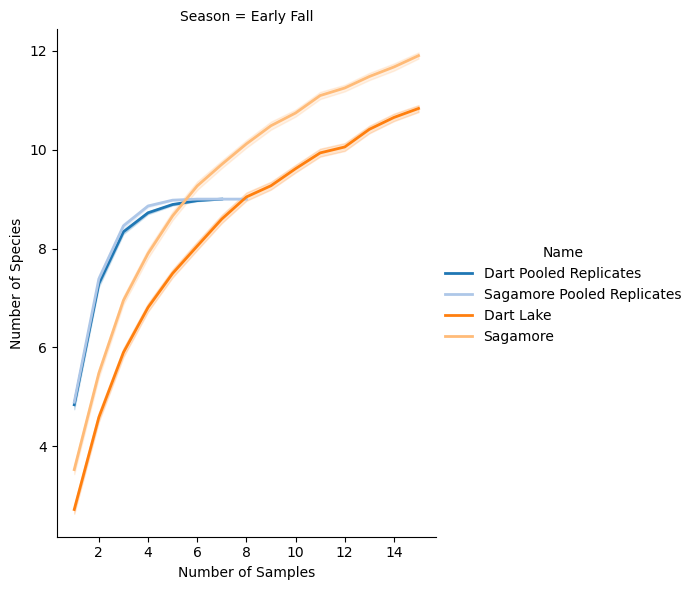

In [44]:
subset = accumulation_curves[accumulation_curves["Number of Samples"] <= 15].reset_index(drop=True)
subset = subset[subset["Name"].str.contains("Dart|Sagamore")].reset_index(drop=True)
subset = subset[subset["Season"] == "Early Fall"].reset_index(drop=True)
g = sns.FacetGrid(subset, col="Season", hue = "Name", palette = "tab20", height=6, aspect=0.8)

# Map a scatterplot to the grid
g.map_dataframe(sns.lineplot, x = "Number of Samples", y = "Number of Species", lw = 2)
g.add_legend()
#plt.savefig("../accumulation_plot_15samps.pdf", dpi = 300, bbox_inches='tight')

In [411]:
jaccard_dict

{'Dart LakeEarly FallDeep': np.float64(0.855937848828029),
 'Dart LakeEarly FallNear Shore': np.float64(0.7969948602299091),
 'Dart LakeEarly FallSurface': np.float64(0.8030020248568636),
 'Dart LakeSpringDeep': np.float64(0.8092556905460132),
 'Dart LakeSpringNear Shore': np.float64(0.6820238862255389),
 'Dart LakeSpringSurface': np.float64(0.7316385785277809),
 'East CopperasEarly FallDeep': np.float64(0.9106264323911383),
 'East CopperasEarly FallNear Shore': np.float64(0.8707325354384178),
 'East CopperasEarly FallSurface': np.float64(0.923040488922842),
 'East CopperasSpringDeep': np.float64(0.9492436974789916),
 'East CopperasSpringNear Shore': np.float64(0.8715151515151515),
 'East CopperasSpringSurface': np.float64(0.8544411860540893),
 'HeartEarly FallDeep': np.float64(0.7939258658008658),
 'HeartEarly FallNear Shore': np.float64(0.7659677419354839),
 'HeartEarly FallSurface': np.float64(0.8352938301420275),
 'HeartSpringDeep': np.float64(0.8147168896884267),
 'HeartSpringNear

In [27]:
from itertools import combinations, product

In [394]:
for combo in combinations(habtype.columns.tolist(), 2):
    print(list(combo))

[288, 289]
[288, 290]
[288, 291]
[288, 292]
[288, 293]
[289, 290]
[289, 291]
[289, 292]
[289, 293]
[290, 291]
[290, 292]
[290, 293]
[291, 292]
[291, 293]
[292, 293]


In [376]:
np.mean(jaccards)

np.float64(0.804699029035993)

In [365]:
rep1greater

['Dart LakeEarly FallDeep1',
 'SagamoreEarly FallNear Shore3A',
 'SagamoreEarly FallSurface3',
 'SagamoreEarly FallSurface1']

In [367]:
print(jaccard_score(reps[243].tolist(), reps[244].tolist(), average = 'weighted'))

0.7237076648841354


In [368]:
print(jaccard_score(reps[243].tolist(), reps[240].tolist(), average = 'weighted'))

KeyError: 240

In [366]:
reps

,243,244
Lepomis,18417.0,0.0
Lepomis gibbosus,23384.0,0.0
Perca flavescens,0.0,0.0
Micropterus salmoides,0.0,0.0
Salvelinus fontinalis,0.0,0.0
Catostomus commersonii,51568.0,86861.0
Semotilus atromaculatus,0.0,0.0
Umbra limi,0.0,0.0
Notemigonus crysoleucas,0.0,0.0
Ameiurus nebulosus,0.0,1113.0


In [173]:
metadata = pd.read_csv("../master_metadata.csv")
metadata.loc[metadata["Site"] == "Blank", "Name"] = "Field Blank"
metadata.loc[metadata["Site"] == "Extraction Blank", "Name"] = "Extraction Blank"
metadata.loc[metadata["Site"] == "PCR Blank", "Name"] = "PCR Blank"
metadata = metadata[metadata["EGCF-ID"].notna()].reset_index(drop=True)

In [267]:
test = upsetdata[upsetdata["Name"] == "Upper Cascade"][upsetdata["Season"] == "Spring"]

/tmp/ipykernel_1146171/3521000856.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test = upsetdata[upsetdata["Name"] == "Upper Cascade"][upsetdata["Season"] == "Spring"]


In [268]:
test = test.set_index("EGCF-ID")

In [270]:
test

,Lepomis,Lepomis gibbosus,Perca flavescens,Micropterus salmoides,Salvelinus fontinalis,Catostomus commersonii,Semotilus atromaculatus,Umbra limi,Notemigonus crysoleucas,Ameiurus nebulosus,...,Ameiurus melas,Exoglossum maxillingua,Sander vitreus,Cottus cognatus,Salmo trutta,Ameiurus,Name,Season,Description,Site
EGCF-ID,,,,,,,,,,,,,,,,,,,,,
121,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Upper Cascade,Spring,Deep,5
125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Upper Cascade,Spring,Deep,4
128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Upper Cascade,Spring,Deep,3
131,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Upper Cascade,Spring,Deep,2
134,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Upper Cascade,Spring,Deep,1
122,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Upper Cascade,Spring,Near Shore,5A
124,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,Upper Cascade,Spring,Near Shore,4A
127,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Upper Cascade,Spring,Near Shore,3A
130,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Upper Cascade,Spring,Near Shore,2A


In [271]:
lake_groups

Description
Deep               [121, 125, 128, 131, 134]
Near Shore         [122, 124, 127, 130, 133]
Surface       [123, 126, 129, 132, 135, 136]
Name: EGCF-ID, dtype: object

In [272]:
start_idx

10

In [273]:
end_idx

16

In [277]:
lake_groups

Description
Deep               [121, 125, 128, 131, 134]
Near Shore         [122, 124, 127, 130, 133]
Surface       [123, 126, 129, 132, 135, 136]
Name: EGCF-ID, dtype: object

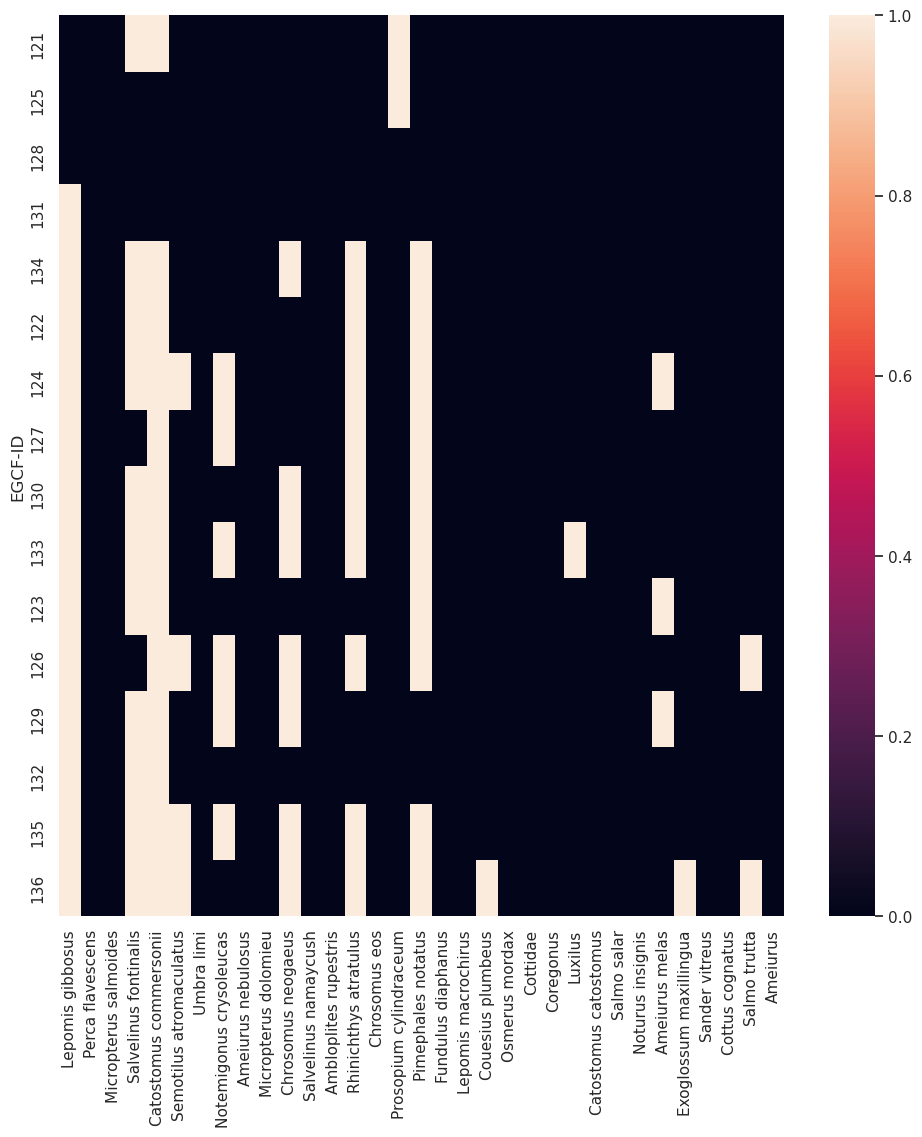

In [275]:
sns.set_theme(rc={'figure.figsize':(11.7,11.7)})
sns.heatmap(test[test.columns[1:-4]]) 
lake_groups = test[test.columns[-4:].tolist() + [test.columns[0]]].reset_index(drop=False).groupby("Description")["EGCF-ID"].unique()
for lake, sites in lake_groups.items():
    site_indices = [test[test.columns[1:-4]].index.get_loc(site) for site in sites.tolist()]
    start_idx = min(site_indices)  # The first row index for this lake
    end_idx = max(site_indices) + 1  # The last row index for this lake (inclusive)

    # Draw the rectangle for the lake (spanning all sites in the lake)
    ax.add_patch(Rectangle((0, start_idx), 
                           len(test[test.columns[1:-4]].columns), end_idx - start_idx, 
                           fill=True, edgecolor='red', lw=2))

# Show the plot
plt.show()

In [103]:
upsetdata

Overall_Best,Lepomis,Lepomis gibbosus,Perca flavescens,Micropterus salmoides,Salvelinus fontinalis,Catostomus commersonii,Semotilus atromaculatus,Umbra limi,Notemigonus crysoleucas,Ameiurus nebulosus,...,Luxilus,Catostomus catostomus,Salmo salar,Noturus insignis,Ameiurus melas,Exoglossum maxillingua,Sander vitreus,Cottus cognatus,Salmo trutta,Ameiurus
1,2967.0,2964.0,8819.0,38406.0,0.0,8184.0,1355.0,3344.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15117.0,18577.0,25695.0,6242.0,0.0,79801.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28595.0,31174.0,0.0,0.0,28237.0,21843.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,16506.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,20391.0,28440.0,53282.0,0.0,0.0,30142.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109968.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11478.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
385,0.0,0.0,0.0,0.0,52685.0,0.0,0.0,0.0,0.0,68897.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
group_dict={}

for index,row  in upsetdata.iterrows():
    for sp,count in row.items():
        if sp != "total" and count != 0:
            group_dict.setdefault(index, []).append(sp)

In [99]:
x = from_memberships(group_dict.values()).sort_values(ascending= False)
x = pd.DataFrame(x)
x = x.reset_index(drop=False)

/storage/group/ibb3/default/.conda/envs/mapping/lib/python3.13/site-packages/upsetplot/data.py:303: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)


In [100]:
x = x.set_index(x.columns[:-1].tolist())

In [101]:
upset = UpSet(x, 
          subset_size='count',
          show_counts=True)

/storage/group/ibb3/default/.conda/envs/mapping/lib/python3.13/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/storage/group/ibb3/default/.conda/envs/mapping/lib/python3.13/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate obj

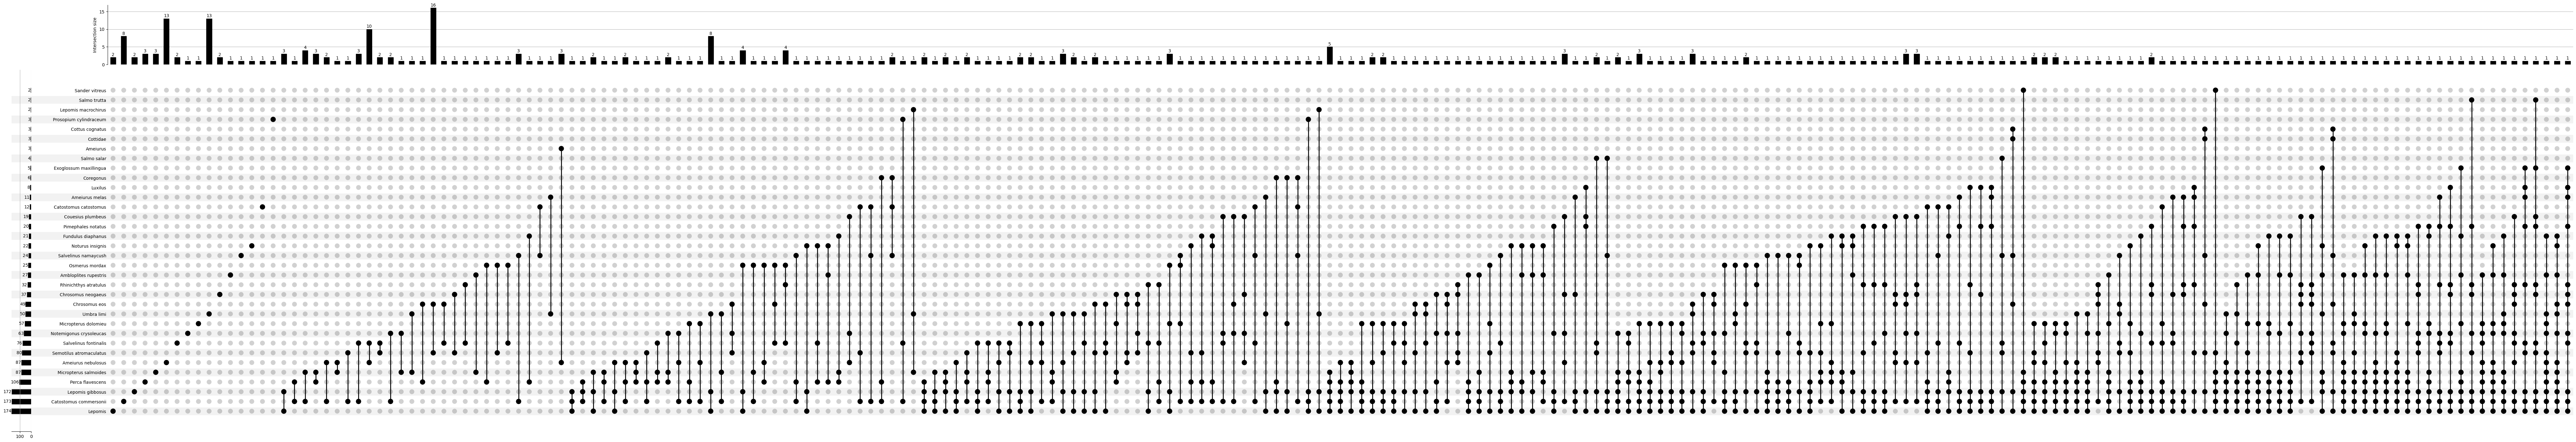

In [107]:
upset

/storage/group/ibb3/default/.conda/envs/mapping/lib/python3.13/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/storage/group/ibb3/default/.conda/envs/mapping/lib/python3.13/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate obj

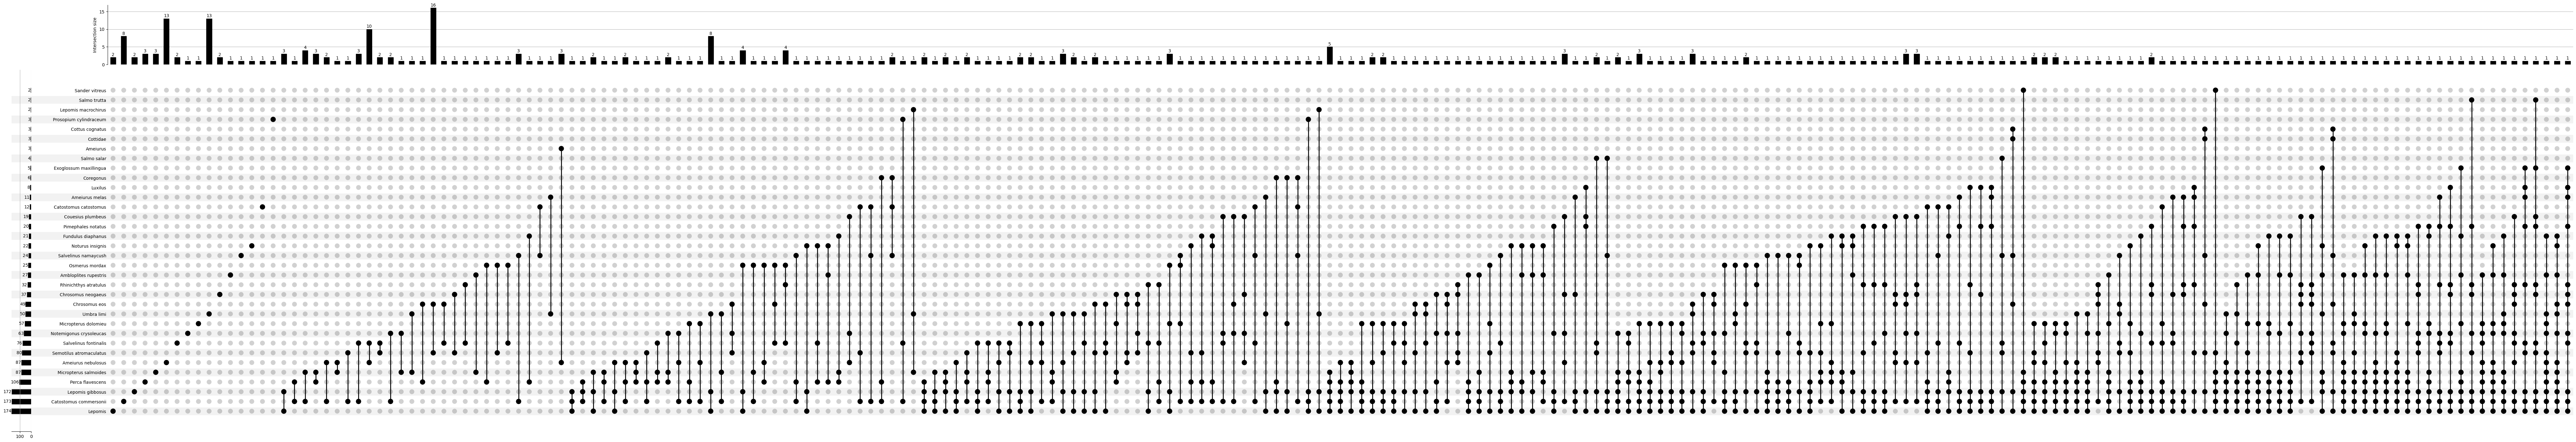

In [102]:
upset

/storage/group/ibb3/default/.conda/envs/mapping/lib/python3.13/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/storage/group/ibb3/default/.conda/envs/mapping/lib/python3.13/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate obj

IndexError: index -1 is out of bounds for axis 0 with size 0

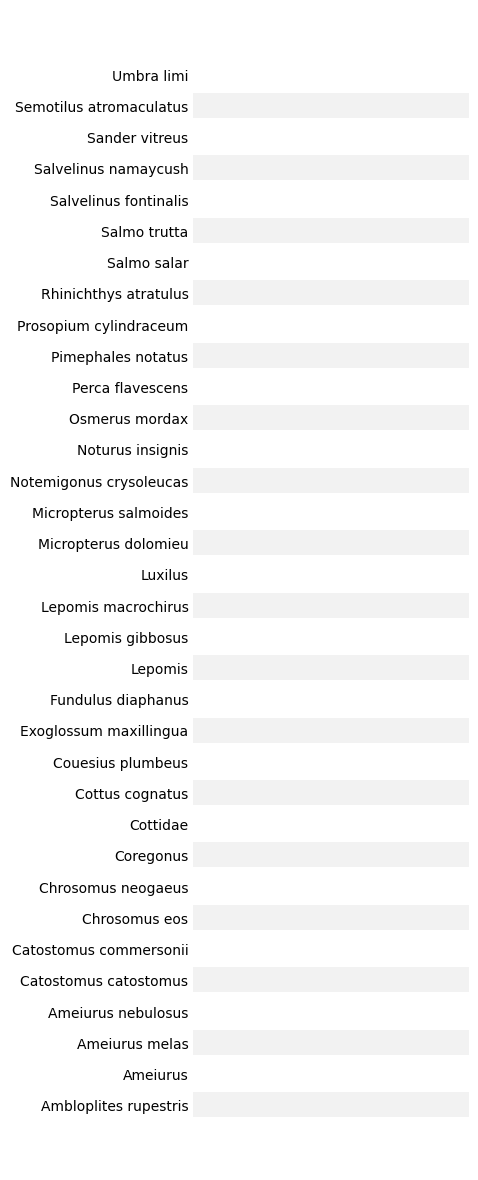

In [76]:
d = upset.plot()
plt.title('Intersecting Orthogroups')

In [53]:
x

,Ambloplites rupestris,Ameiurus,Ameiurus melas,Ameiurus nebulosus,Catostomus catostomus,Catostomus commersonii,Chrosomus eos,Chrosomus neogaeus,Coregonus,Cottidae,...,Prosopium cylindraceum,Rhinichthys atratulus,Salmo salar,Salmo trutta,Salvelinus fontinalis,Salvelinus namaycush,Sander vitreus,Semotilus atromaculatus,Umbra limi,ones
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
1,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,True,1
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
3,True,False,False,True,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,1
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,1
357,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,1
358,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,1
359,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,1


In [24]:
from upsetplot import from_memberships
from upsetplot import generate_samples
from sklearn.datasets import load_diabetes
from upsetplot import plot
from matplotlib import pyplot
import matplotlib.pyplot as plt
from upsetplot import UpSet
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

example_samples_df = generate_samples()

In [55]:
genes = pd.read_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/primary_transcripts/OrthoFinder/Results_Nov26/Phylogenetic_Hierarchical_Orthogroups/N0.GeneCount.csv", sep = "\t")
genes = genes[list(genes.columns[3:])]
genes.columns = [
"Acropora cervicornis",
    "Amplexidiscus fenestrafer",
    "Acropora loripes",
 "Acropora millepora",
    "Acropora palmata",
 "Astrangia poculata",
    "Catalaphyllia jardinei",
 "Colpophyllia natans", 
 "Dendrogyra cylindrus", 
 "Desmophyllum pertusum", 
 "Discosoma spp.", 
 "Fungia fungites",
    "Goniastrea aspera",
 "Galaxea fascicularis",
    "Montipora capitata",
 "Orbicella faveolata", 
 "Porites compressa",
    "Platygyra daedalea",
    "Porites lobata",
    "Pocillopora meandrina",
 "Pocillopora verrucosa",
    "Stylophora pistillata",
 "Siderastrea siderea"]

In [57]:
group_dict={}

for index,row  in genes.iterrows():
    for sp,count in row.items():
        if sp != "total" and count != 0:
            group_dict.setdefault(index, []).append(sp)

In [58]:
x = from_memberships(group_dict.values()).sort_values(ascending= False)
x = pd.DataFrame(x)
x = x.reset_index(drop=False)
x = x[['Goniastrea aspera',
 'Platygyra daedalea',
 'Catalaphyllia jardinei',
 'Orbicella faveolata',
 'Colpophyllia natans',
 'Dendrogyra cylindrus',
 'Astrangia poculata',
 'Fungia fungites',
 'Desmophyllum pertusum',
 'Pocillopora meandrina',
 'Pocillopora verrucosa',
 'Stylophora pistillata',
 'Acropora loripes',
 'Acropora millepora',
 'Acropora cervicornis',
 'Acropora palmata',
 'Montipora capitata',
 'Galaxea fascicularis',
 'Porites lobata',
 'Porites compressa',
 'Siderastrea siderea',
 'Amplexidiscus fenestrafer',
 'Discosoma spp.',
       "ones"]]
x = x.set_index(['Goniastrea aspera',
 'Platygyra daedalea',
 'Catalaphyllia jardinei',
 'Orbicella faveolata',
 'Colpophyllia natans',
 'Dendrogyra cylindrus',
 'Astrangia poculata',
 'Fungia fungites',
 'Desmophyllum pertusum',
 'Pocillopora meandrina',
 'Pocillopora verrucosa',
 'Stylophora pistillata',
 'Acropora loripes',
 'Acropora millepora',
 'Acropora cervicornis',
 'Acropora palmata',
 'Montipora capitata',
 'Galaxea fascicularis',
 'Porites lobata',
 'Porites compressa',
 'Siderastrea siderea',
 'Amplexidiscus fenestrafer',
 'Discosoma spp.'])

/storage/group/ibb3/default/.conda/envs/mapping/lib/python3.13/site-packages/upsetplot/data.py:303: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)


In [59]:
x

ones
Goniastrea aspera Platygyra daedalea Catalaphyllia jardinei Orbicella faveolata Colpophyllia natans Dendrogyra cylindrus Astrangia poculata Fungia fungites Desmophyllum pertusum Pocillopora meandrina Pocillopora verrucosa Stylophora pistillata Acropora loripes Acropora millepora Acropora cervicornis Acropora palmata Montipora capitata Galaxea fascicularis Porites lobata Porites compressa Siderastrea siderea Amplexidiscus fenestrafer Discosoma spp.      
False             False              False                  False               False               False                False              False           False                 False                 False                 False                 False            False              False                False            False              False                False          False             True                False                     False              1
True              True               True                   False               False               False                False              False           False                 False                 False                 False                 False            False              False                False            False              True                 False          False             False               False                     False              1
False             False              False                  False               True                False                False              False           False                 False                 False                 False                 True             False              True                 True             True               False                True           True              True                False                     True               1
                  True               False                  False               False               False                False              False           False                 True                  False                 False                 True             True               True                 True             True               True                 False          True              False               False                     True               1
                  False              False                  False               False               True                 True               True            True                  True                  True                  False                 True             True               True                 True             True               True                 False          True              True                False                     True               1
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                   ...
                                                                                                    False                False              False           False                 False                 False                 False                 False            False              False                False            True               False                False          False             False               False                     False              1
True              True               False                  False               True                False                False              False           True                  True                  False                 False                 True             True               True                 True             True         

In [29]:
x

ones
Goniastrea aspera Platygyra daedalea Catalaphyllia jardinei Orbicella faveolata Colpophyllia natans Dendrogyra cylindrus Astrangia poculata Fungia fungites Desmophyllum pertusum Pocillopora meandrina Pocillopora verrucosa Stylophora pistillata Acropora loripes Acropora millepora Acropora cervicornis Acropora palmata Montipora capitata Galaxea fascicularis Porites lobata Porites compressa Siderastrea siderea Amplexidiscus fenestrafer Discosoma spp.      
False             False              False                  False               False               False                False              False           False                 False                 False                 False                 False            False              False                False            False              False                False          False             True                False                     False              1
True              True               True                   False               False               False                False              False           False                 False                 False                 False                 False            False              False                False            False              True                 False          False             False               False                     False              1
False             False              False                  False               True                False                False              False           False                 False                 False                 False                 True             False              True                 True             True               False                True           True              True                False                     True               1
                  True               False                  False               False               False                False              False           False                 True                  False                 False                 True             True               True                 True             True               True                 False          True              False               False                     True               1
                  False              False                  False               False               True                 True               True            True                  True                  True                  False                 True             True               True                 True             True               True                 False          True              True                False                     True               1
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                   ...
                                                                                                    False                False              False           False                 False                 False                 False                 False            False              False                False            True               False                False          False             False               False                     False              1
True              True               False                  False               True                False                False              False           True                  True                  False                 False                 True             True               True                 True             True         

In [19]:
memberships

[('Site1',), ('Site2',), ('Site1', 'Site2', 'Site3'), ('Site3',)]

In [17]:
membership_series

(Site1,)                 1
(Site2,)                 1
(Site1, Site2, Site3)    1
(Site3,)                 1
Name: count, dtype: int64

In [16]:
membership_series.values

array([1, 1, 1, 1])

In [15]:
upset_data

Site1  Site2  Site3
True   False  False    1
False  True   False    1
True   True   True     1
False  False  True     1
dtype: int64

/storage/group/ibb3/default/.conda/envs/mapping/lib/python3.13/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/storage/group/ibb3/default/.conda/envs/mapping/lib/python3.13/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate obj

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

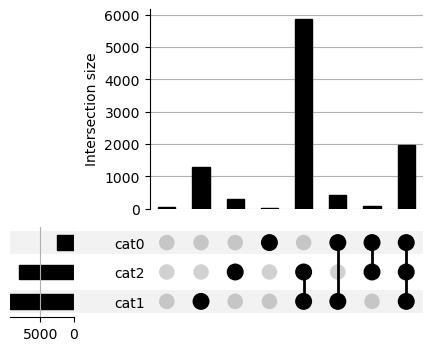

In [11]:
from upsetplot import generate_counts
from upsetplot import plot

example = generate_counts()
plot(example) 

In [12]:
example

cat0   cat1   cat2 
False  False  False      56
              True      283
       True   False    1279
              True     5882
True   False  False      24
              True       90
       True   False     429
              True     1957
Name: value, dtype: int64

In [8]:
import pandas as pd
from upsetplot import from_memberships, UpSet
import matplotlib.pyplot as plt

# Example data: Species presence/absence for 20 sites (replicates A and B)
data = {
    'Site': ['Site1', 'Site1', 'Site2', 'Site2', 'Site3', 'Site3'],
    'Replicate': ['A', 'B', 'A', 'B', 'A', 'B'],
    'Species': ['Species1', 'Species1', 'Species1', 'Species2', 'Species3', 'Species4'],
    'Count': [5, 3, 10, 0, 7, 2]  # Example counts
}
df = pd.DataFrame(data)

# Step 1: Create a presence/absence column
df['Presence'] = df['Count'] > 0

# Step 2: Pivot the data to show presence/absence for each species in each replicate
presence_absence = df.pivot_table(index='Species', columns=['Site', 'Replicate'], values='Presence', aggfunc='max', fill_value=False)

# Step 3: Convert multi-index columns to strings
presence_absence.columns = [f"{site}-{rep}" for site, rep in presence_absence.columns]

# Step 4: Create membership data
memberships = [
    tuple(col for col in presence_absence.columns if row[col])  # Convert to tuples for grouping
    for _, row in presence_absence.iterrows()
]

# Step 5: Aggregate species into their respective memberships
# This step ensures that intersection sizes reflect how many species belong to each subset
membership_series = pd.Series(memberships).value_counts()

# Step 6: Convert to UpSet-compatible dataset
upset_data = from_memberships(membership_series)

# Step 7: Plot the UpSet plot
upset = UpSet(upset_data, subset_size='count', show_counts=True, sort_by='degree')
upset.plot()
plt.show()


TypeError: 'int' object is not iterable

In [7]:
upset_data

Site1-A  Site1-B  Site2-A  Site3-A  Site3-B
True     True     True     False    False      1
False    False    False    False    False      1
                           True     False      1
                           False    True       1
Name: ones, dtype: int64